
## **ANALISIS 3 BIG DATA AND INFORMATION RETRIEVAL : Predicting Pulsar Star Menggunakan SVM (Support Vector Machines) **
---
---

#### Dalam kesempatan kali ini, Saya akan melakukan latihan tentang konsep Support Vector Machines atau SVM untuk memprediksi Pulsar Star berdasarkan data yang tersedia dan bisa didapatkan dari Kaggle dan menambahkan confusion matrix dan classification report dalam latihan kali ini.
---
> Nama      : Luthfan Fauza Musyaffa

> NIM       : 5311422073

> Prodi     : Teknik Elektro

> Mata Kuliah : BIG DATA AND INFORMATION RETRIEVAL
---






# **Pertama Import Library Yang Diperlukan** <a class="anchor" id="6"></a>


Code dibawah ini adalah kode Python yang akan kita gunakan dalam latihan SVM kali ini untuk memprediksi pulsar star, untuk analisis data kali ini menggunakan library numpy, pandas, matplotlib, dan seaborn. Berikut adalah penjelasan singkat tentang setiap bagian dari kode tersebut:

** Import Libraries: Mengimpor library yang diperlukan untuk analisis data:

- numpy digunakan untuk operasi array dan matriks.
- pandas digunakan untuk manipulasi dan analisis data, terutama data tabular.
- matplotlib.pyplot digunakan untuk visualisasi data.
- seaborn digunakan untuk visualisasi data statistik yang menarik dan informatif.

** %matplotlib inline: Ini adalah magic command IPython yang digunakan untuk menampilkan plot matplotlib secara langsung di notebook Jupyter.

** Walk Through Input Directory: Ini adalah bagian yang digunakan untuk menelusuri direktori input dan mencetak semua nama file di dalamnya.

** Any results you write to the current directory are saved as output: Ini adalah komentar yang memberi tahu pengguna bahwa hasil dari analisis atau pemrosesan data akan disimpan di direktori saat ini sebagai output.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.


/kaggle/input/predicting-pulsar-starintermediate/pulsar_data_train.csv
/kaggle/input/predicting-pulsar-starintermediate/pulsar_data_test.csv
/kaggle/input/pulsar-star/pulsar_stars.csv


In [ ]:
import warnings

warnings.filterwarnings('ignore')


** Kode diatas menggunakan modul warnings untuk mengabaikan atau menyembunyikan semua peringatan yang akan muncul selama eksekusi program. Ini sering digunakan untuk mematikan pesan peringatan yang tidak diinginkan agar tidak mengganggu keluaran atau tampilan program.

# **Masukkan Dataset** <a class="anchor" id="7"></a>

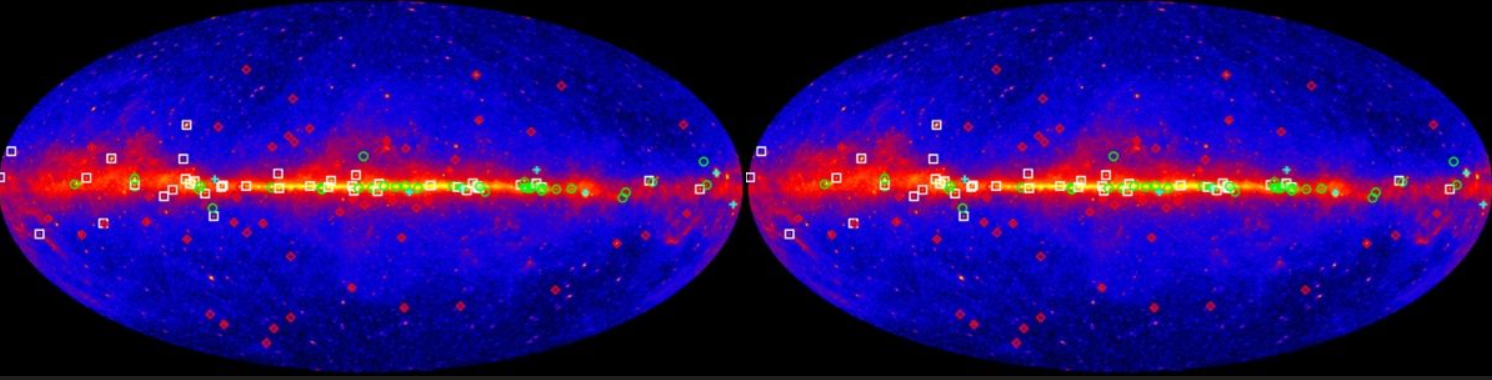

Kode dibawah akan melakukan pembacaan sebuah file CSV yang berisi data tentang bintang pulsar, kemudian memuatnya ke dalam struktur data DataFrame menggunakan library pandas. Berikut penjelasan langkah-langkahnya:

- data = '/kaggle/input/predicting-a-pulsar-star/pulsar_stars.csv': Pada baris pertama, sebuah string disimpan dalam variabel data. String tersebut adalah path atau jalur ke lokasi file CSV yang akan dibaca. Jalur ini menunjukkan lokasi file pada platform Kaggle.

- data = '/kaggle/input/pulsar-star/pulsar_stars.csv': Namun, baris ini mengubah nilai variabel data. Mungkin ini merupakan kesalahan karena jalur file yang diarahkan adalah ke file yang berbeda. Kode ini menimpa nilai yang sebelumnya disimpan di variabel data.

- df = pd.read_csv(data): Pada baris ini, fungsi pd.read_csv() dari library pandas digunakan untuk membaca file CSV yang diarahkan oleh path yang disimpan dalam variabel data. Data dari file CSV tersebut dimuat ke dalam DataFrame yang disimpan dalam variabel df.



In [ ]:
data = '/kaggle/input/predicting-a-pulsar-star/pulsar_stars.csv'
data = '/kaggle/input/pulsar-star/pulsar_stars.csv'


df = pd.read_csv(data)

#Perintah diatas mendefinisikan dua variabel data, yang merupakan jalur file CSV yang berbeda:

- data = '/kaggle/input/predicting-a-pulsar-star/pulsar_stars.csv'
- data = '/kaggle/input/pulsar-star/pulsar_stars.csv'

Setelah variabel data diperbarui, fungsi pd.read_csv() dari library pandas digunakan untuk membaca file CSV yang diarahkan oleh variabel data. Data dari file CSV tersebut dimuat ke dalam DataFrame yang disimpan dalam variabel df.

# **Melihat Dimensi** <a class="anchor" id="8"></a>


Kode ini menggunakan atribut .shape dari DataFrame df untuk melihat dimensi atau ukuran dataset yang telah dimuat. Berikut adalah penjelasan singkatnya:

- df.shape: Ini adalah sebuah atribut pada DataFrame yang digunakan untuk mengambil dimensi dari DataFrame tersebut. Atribut ini mengembalikan tuple yang berisi jumlah baris dan kolom dalam DataFrame.



In [ ]:
# view dimensions of dataset

df.shape

(17898, 9)

Jadi, ketika kode tersebut dieksekusi, akan menghasilkan output yang menunjukkan jumlah baris dan kolom dalam dataset yang dimuat ke dalam DataFrame df. Jadi outputnya adalah (17898, 9), itu berarti dataset tersebut memiliki 17898 baris dan 9 kolom.

# **Preview Data** <a class="anchor" id="8"></a>


Kode dibawah menggunakan metode .head() pada DataFrame df untuk menampilkan beberapa baris pertama dari dataset. Berikut adalah penjelasan singkatnya:

- df.head(): Ini adalah sebuah metode pada DataFrame yang digunakan untuk menampilkan beberapa baris pertama dari dataset. Secara default, metode ini akan menampilkan lima baris pertama dari dataset, tetapi Anda juga dapat menyertakan argumen angka dalam kurung untuk menentukan jumlah baris yang ingin ditampilkan.

Jadi, ketika kode tersebut dieksekusi, itu akan mencetak lima baris pertama dari dataset yang dimuat ke dalam DataFrame df, memberikan gambaran awal tentang struktur dan konten dari dataset tersebut.

In [ ]:
# let's preview the dataset

df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


Nah.. disini kita dapat melihat bahwa ada 9 variabel dalam dataset. 8 variabel tersebut adalah variabel kontinu dan 1 variabel adalah variabel diskrit. Variabel diskrit tersebut adalah variabel target_class. Ini juga merupakan variabel target.


#Pengambilan Daftar Nama Kolom Dalam Dataset

Kode dibawah menggunakan atribut .columns pada DataFrame df untuk mengambil daftar nama-nama kolom dalam dataset. Berikut adalah penjelasannya:

- col_names = df.columns: Ini adalah sebuah baris kode yang menggunakan atribut .columns pada DataFrame df untuk mengambil daftar nama-nama kolom dari dataset yang dimuat ke dalam DataFrame tersebut. Nama-nama kolom ini kemudian disimpan dalam variabel col_names.

- col_names: Setelah mendapatkan daftar nama-nama kolom, variabel col_names kemudian dicetak atau ditampilkan. Ini akan menampilkan daftar nama-nama kolom dalam dataset.

In [ ]:
# view the column names of the dataframe

col_names = df.columns

col_names

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')


Kita dapat melihat bahwa terdapat spasi di awal (spasi di awal string nama) dalam dataframe. Oleh karena itu, saya akan menghapus spasi yang berada di awal ini. Ini penting karena spasi di awal nama kolom dapat menyebabkan masalah dalam pemrosesan data, khususnya ketika merujuk ke kolom dengan nama yang benar.

- Untuk menghapus spasi yang ada di awal nama kolom, saya akan menggunakan metode .str.strip() pada objek col_names, yang akan menghapus spasi di awal dan akhir setiap string dalam daftar nama kolom.

- Selanjutnya, saya akan menetapkan daftar nama kolom yang telah diperbarui kembali ke DataFrame menggunakan atribut .columns. Hal ini akan memperbarui nama-nama kolom dalam DataFrame tanpa spasi di awalnya.

In [ ]:
# remove leading spaces from column names

df.columns = df.columns.str.strip()

In [ ]:
# view column names again

df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

Kita dapat melihat bahwa spasi di depan dihilangkan dari nama kolom. Tapi nama kolomnya sangat panjang. Jadi, saya akan mempersingkatnya dengan mengganti namanya.

In [ ]:
# rename column names

df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness',
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

In [ ]:
# view the renamed column names

df.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')


Kode tersebut untuk melakukan penggantian nama kolom dalam DataFrame df. Berikut adalah penjelasan singkatnya:

- df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']:
Pada baris ini, nama-nama kolom dalam DataFrame df diganti dengan nama-nama baru yang diberikan dalam bentuk daftar. Setiap nama kolom yang baru disematkan sesuai dengan urutan yang sesuai dengan maknanya. Dengan cara ini, setiap kolom akan memiliki nama yang lebih deskriptif dan informatif.

Kita dapat lihat bahwa nama kolom dipersingkat. IP adalah singkatan dari `profil terintegrasi` dan DM-SNR adalah singkatan dari `modulasi delta dan rasio sinyal terhadap kebisingan`. Sekarang, bekerja dengan kolom jauh lebih mudah.

#Cek distribusi dari kolom

Untuk memeriksa distribusi dari kolom target_class,  saya menggunakan metode .value_counts() pada kolom tersebut. Ini akan menghitung jumlah kemunculan setiap nilai unik dalam kolom target_class, sehingga memberikan gambaran tentang sebaran nilai target dalam dataset.

In [ ]:
# check distribution of target_class column

df['target_class'].value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

In [ ]:
# view the percentage distribution of target_class column

df['target_class'].value_counts()/np.float(len(df))

0    0.908426
1    0.091574
Name: target_class, dtype: float64

Kita dapat melihat bahwa persentase observasi dari label kelas 0 dan 1 adalah 90,84% dan 9,16%. Ini menunjukkan bahwa dataset ini memiliki masalah ketidakseimbangan kelas. Masalah ketidakseimbangan kelas terjadi ketika jumlah observasi dalam setiap kelas tidak seimbang, sehingga satu kelas memiliki jumlah observasi yang jauh lebih banyak daripada yang lain.

## Mencari nilai yang hilang

In [ ]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
IP Mean            17898 non-null float64
IP Sd              17898 non-null float64
IP Kurtosis        17898 non-null float64
IP Skewness        17898 non-null float64
DM-SNR Mean        17898 non-null float64
DM-SNR Sd          17898 non-null float64
DM-SNR Kurtosis    17898 non-null float64
DM-SNR Skewness    17898 non-null float64
target_class       17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


Kita dapat melihat bahwa tidak ada nilai yang hilang dalam dataset dan semua variabelnya adalah variabel numerik.

### Mencari nilai yang hilang dalam variabel

In [ ]:
# check for missing values in variables

df.isnull().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

Kita dapat melihat bahwa tidak ada nilai yang hilang dalam dataset.

### Ringkasan variabel numerik


- Ada 9 variabel numerik dalam dataset.


- 8 adalah variabel kontinu dan 1 adalah variabel diskrit.


- Variabel diskrit adalah variabel `kelas_target`. Itu juga merupakan variabel target.


- Tidak ada nilai yang hilang dalam kumpulan data.

### Outliers Variabel Numerik
- df.describe(): Metode ini menghasilkan ringkasan statistik deskriptif seperti rata-rata, standar deviasi, nilai minimum, kuartil, dan nilai maksimum dari setiap variabel numerik dalam DataFrame. Ringkasan ini membantu untuk memahami distribusi dan karakteristik data dalam variabel-variabel tersebut.

- round(df.describe(), 2): Fungsi round() digunakan untuk membulatkan nilai-nilai statistik yang dihasilkan oleh df.describe() menjadi dua angka desimal. Ini membantu agar output menjadi lebih mudah dibaca dan lebih rapi.

Jadi, output dari kode tersebut adalah ringkasan statistik deskriptif dari variabel-variabel numerik dalam dataset, dengan nilai-nilai yang dibulatkan menjadi dua angka desimal. Hal ini berguna untuk mendapatkan pemahaman awal tentang distribusi dan karakteristik data dalam dataset tersebut.

In [ ]:
# view summary statistics in numerical variables

round(df.describe(),2)

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00
mean,111.08,46.55,0.48,1.77,12.61,26.33,8.30,104.86,0.09
std,25.65,6.84,1.06,6.17,29.47,19.47,4.51,106.51,0.29
min,5.81,24.77,-1.88,-1.79,0.21,7.37,-3.14,-1.98,0.00
25%,100.93,42.38,0.03,-0.19,1.92,14.44,5.78,34.96,0.00
50%,115.08,46.95,0.22,0.20,2.80,18.46,8.43,83.06,0.00
75%,127.09,51.02,0.47,0.93,5.46,28.43,10.70,139.31,0.00
max,192.62,98.78,8.07,68.10,223.39,110.64,34.54,1191.00,1.00


#Membuat Boxplot untuk memvisualisasikan outliers


Untuk membuat boxplot untuk setiap variabel numerik dalam DataFrame df. Berikut adalah penjelasan langkah-langkah yang saya lakukan:

- plt.figure(figsize=(24,20)): Ini mengatur ukuran gambar untuk menampung semua boxplot yang akan digambarkan. Ukuran gambar disesuaikan dengan panjang dan lebar tertentu.

- Setiap plt.subplot(4, 2, i): Ini mengatur subplot atau area gambar di mana boxplot akan digambarkan. Subplot disusun dalam grid 4x2, yang berarti akan ada 4 baris dan 2 kolom. Variabel i digunakan untuk menunjukkan posisi subplot dalam grid.

- fig = df.boxplot(column='Nama_Kolom'): Ini menggambar boxplot untuk variabel numerik tertentu dalam DataFrame df. Parameter column digunakan untuk menentukan kolom mana yang akan digunakan untuk menggambar boxplot.

- fig.set_title('') dan fig.set_ylabel(''): Ini mengatur judul dan label sumbu y untuk setiap boxplot. Di sini, judul dan label sumbu y diatur menjadi kosong karena mereka tidak diperlukan untuk analisis ini.

Text(0, 0.5, 'DM-SNR Skewness')

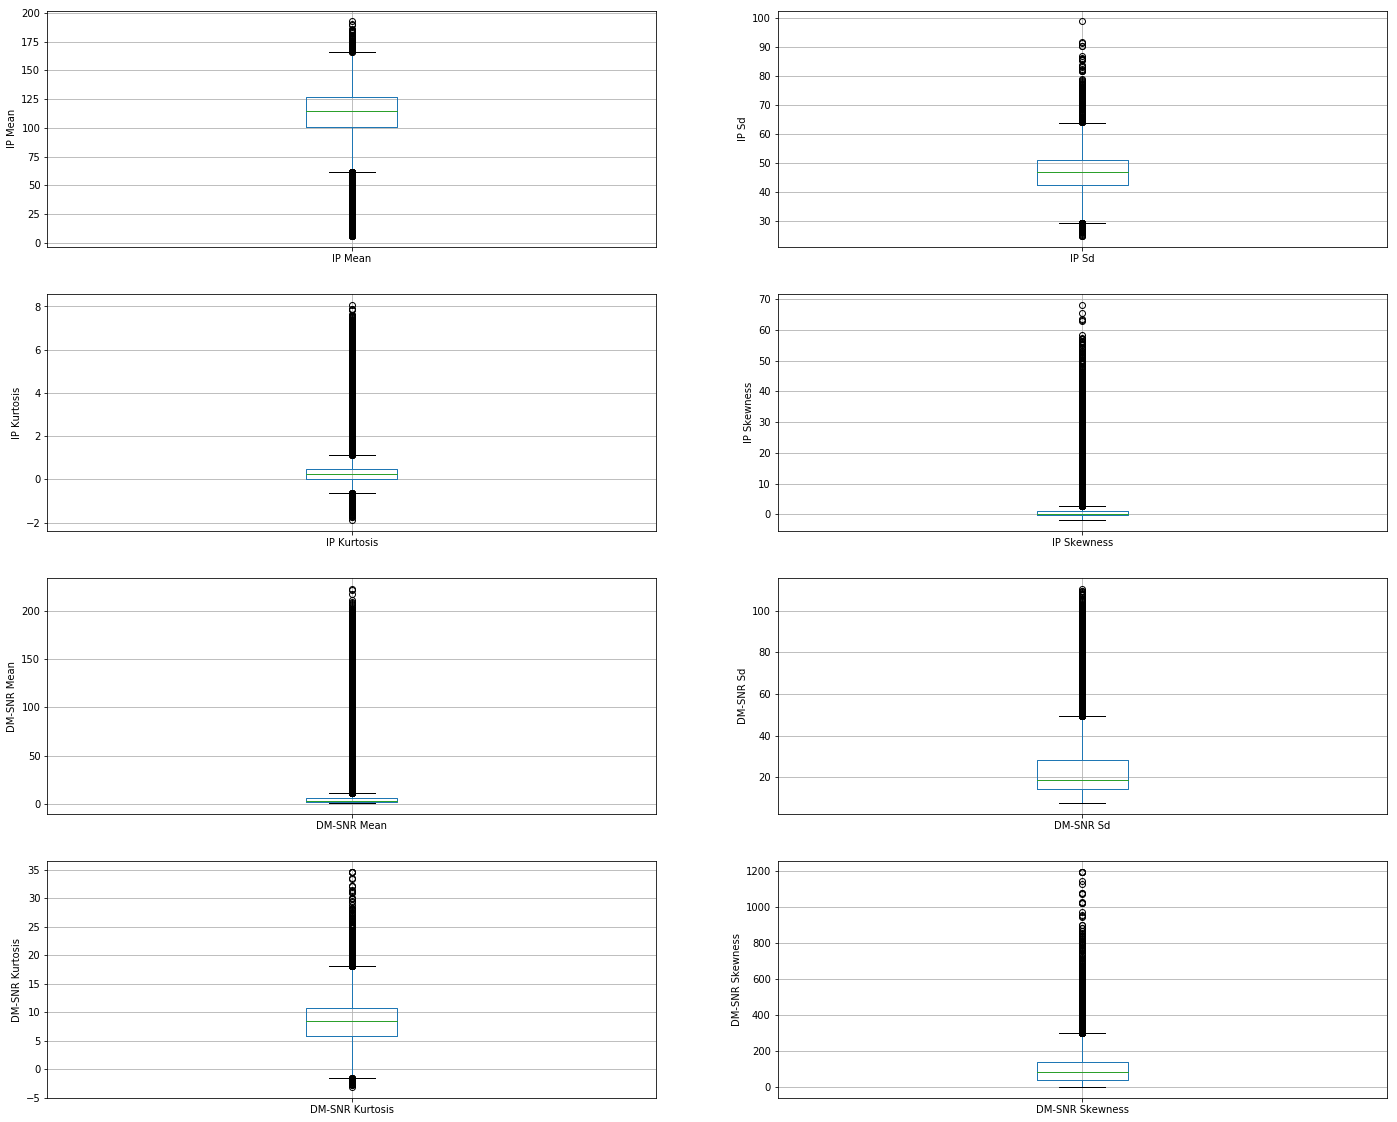

In [ ]:
# draw boxplots to visualize outliers

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='IP Mean')
fig.set_title('')
fig.set_ylabel('IP Mean')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='IP Sd')
fig.set_title('')
fig.set_ylabel('IP Sd')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='IP Kurtosis')
fig.set_title('')
fig.set_ylabel('IP Kurtosis')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='IP Skewness')
fig.set_title('')
fig.set_ylabel('IP Skewness')


plt.subplot(4, 2, 5)
fig = df.boxplot(column='DM-SNR Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')


plt.subplot(4, 2, 6)
fig = df.boxplot(column='DM-SNR Sd')
fig.set_title('')
fig.set_ylabel('DM-SNR Sd')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='DM-SNR Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')


plt.subplot(4, 2, 8)
fig = df.boxplot(column='DM-SNR Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')

Jadi, keseluruhan kode diatas menghasilkan grid 4x2 boxplot yang menunjukkan distribusi variabel numerik dalam dataset, yang membantu dalam identifikasi outlier dan pemahaman lebih lanjut tentang distribusi data.

#Ada 2 varian dari SVM (Support Vector Machines), yaitu varian hard-margin dan varian soft-margin.

- varian soft-margin dari SVM lebih cocok untuk menangani dataset yang mengandung pencilan, di mana kita mengizinkan beberapa titik yang salah diklasifikasikan dengan membayar penalti dalam bentuk parameter C yang tinggi.


#Membuat Histogram

Kode dibawah menghasilkan histogram untuk setiap variabel numerik dalam DataFrame df. Berikut adalah penjelasan langkah-langkahnya:

- plt.figure(figsize=(24,20)): Ini mengatur ukuran gambar untuk menampung semua histogram yang akan digambarkan. Ukuran gambar disesuaikan dengan panjang dan lebar tertentu.

- Setiap plt.subplot(4, 2, i): Ini mengatur subplot atau area gambar di mana histogram akan digambarkan. Subplot disusun dalam grid 4x2, yang berarti akan ada 4 baris dan 2 kolom. Variabel i digunakan untuk menunjukkan posisi subplot dalam grid.

- fig = df['Nama_Kolom'].hist(bins=20): Ini menggambar histogram untuk variabel numerik tertentu dalam DataFrame df. Parameter bins=20 digunakan untuk menentukan jumlah bin atau interval yang akan digunakan dalam histogram.

- fig.set_xlabel('') dan fig.set_ylabel(''): Ini mengatur label sumbu x dan y untuk setiap histogram. Di sini, label sumbu x diatur menjadi nama variabel yang sesuai, sedangkan label sumbu y diatur menjadi 'Number of pulsar stars'.

Text(0, 0.5, 'Number of pulsar stars')

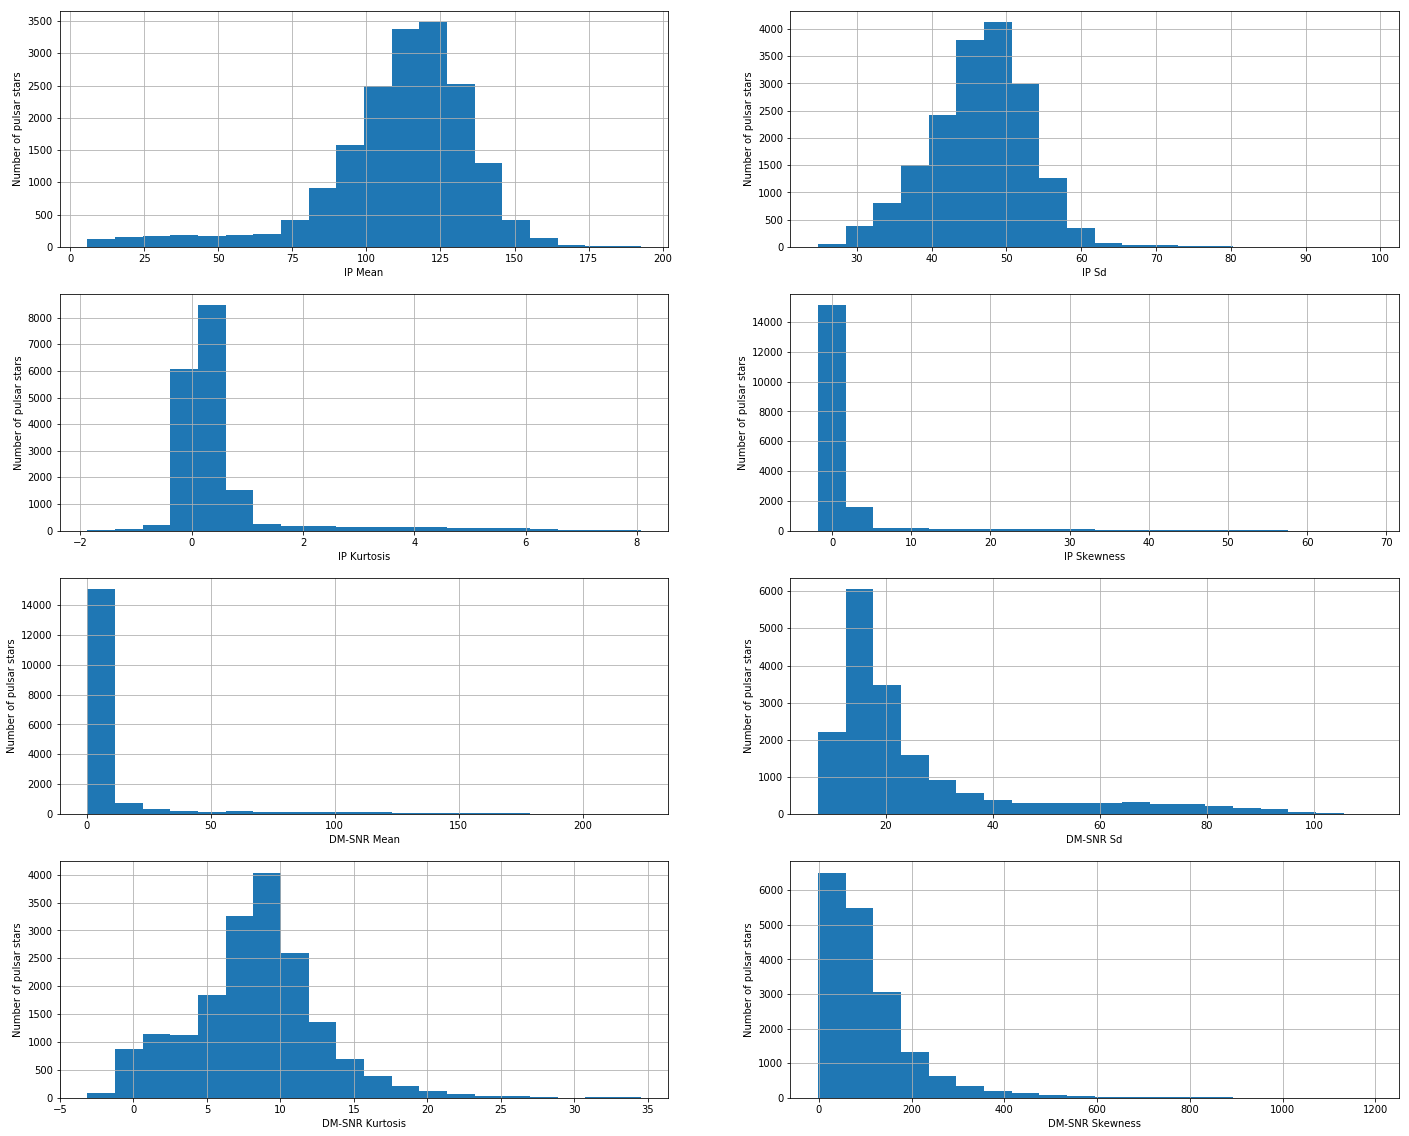

In [ ]:
# plot histogram to check distribution


plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['IP Mean'].hist(bins=20)
fig.set_xlabel('IP Mean')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 2)
fig = df['IP Sd'].hist(bins=20)
fig.set_xlabel('IP Sd')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 3)
fig = df['IP Kurtosis'].hist(bins=20)
fig.set_xlabel('IP Kurtosis')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 4)
fig = df['IP Skewness'].hist(bins=20)
fig.set_xlabel('IP Skewness')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 5)
fig = df['DM-SNR Mean'].hist(bins=20)
fig.set_xlabel('DM-SNR Mean')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 6)
fig = df['DM-SNR Sd'].hist(bins=20)
fig.set_xlabel('DM-SNR Sd')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 7)
fig = df['DM-SNR Kurtosis'].hist(bins=20)
fig.set_xlabel('DM-SNR Kurtosis')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 8)
fig = df['DM-SNR Skewness'].hist(bins=20)
fig.set_xlabel('DM-SNR Skewness')
fig.set_ylabel('Number of pulsar stars')


Jadi, keseluruhan kode tersebut menghasilkan grid 4x2 histogram yang menunjukkan distribusi variabel numerik dalam dataset, yang membantu dalam pemahaman lebih lanjut tentang distribusi data dan identifikasi pola yang mungkin ada.


#Pada langkah ini, Saya akan mendeklarasikan vektor fitur (feature vector) dan variabel target dari dataset. Feature vector adalah himpunan dari fitur-fitur yang akan digunakan untuk melatih model, sedangkan variabel target adalah variabel yang ingin saya prediksi.

- X = df.drop(['target_class'], axis=1): Dalam langkah ini, saya mendefinisikan vektor fitur X. saya menggunakan metode drop() pada DataFrame df untuk menghapus kolom 'target_class', yang merupakan variabel target, dari dataset. X sekarang berisi semua fitur dalam dataset kecuali variabel target.

- y = df['target_class']: Di sini, saya mendefinisikan variabel target y. saya mengambil kolom 'target_class' dari DataFrame df dan menyimpannya dalam variabel y. Ini adalah variabel yang ingin saya prediksi.

Dengan mendefinisikan X sebagai vektor fitur dan y sebagai variabel target, saya telah menyiapkan data untuk diproses dalam pembelajaran mesin, seperti membagi data menjadi set pelatihan dan pengujian, serta melatih model pada data pelatihan dan mengevaluasinya pada data pengujian.

In [ ]:
X = df.drop(['target_class'], axis=1)

y = df['target_class']

# **Membagi Data training and test set** <a class="anchor" id="10"></a>



Pada kode dibawah, menggunakan fungsi train_test_split dari modul sklearn.model_selection untuk membagi data menjadi set pelatihan dan pengujian. Berikut adalah penjelasan singkatnya:

- from sklearn.model_selection import train_test_split: Ini mengimpor fungsi train_test_split dari modul sklearn.model_selection, yang berguna untuk membagi data menjadi set pelatihan dan pengujian.

- X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0): Dalam baris ini, kita memanggil fungsi train_test_split dengan parameter sebagai berikut:

X: Vektor fitur yang akan dibagi.
y: Variabel target yang akan dibagi.

- test_size = 0.2: Ini menentukan proporsi data yang akan dialokasikan untuk set pengujian. Di sini, kami memilih 0.2, yang berarti 20% dari data akan digunakan untuk pengujian.
- random_state = 0: Ini adalah seed yang digunakan oleh generator nomor acak. Ini memastikan bahwa pembagian data menjadi set pelatihan dan pengujian akan selalu sama setiap kali kode dijalankan, sehingga hasilnya dapat direproduksi.
Setelah fungsi train_test_split dieksekusi, hasilnya adalah empat kumpulan data:

X_train: Set fitur pelatihan.
X_test: Set fitur pengujian.
y_train: Set target pelatihan.
y_test: Set target pengujian.

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((14318, 8), (3580, 8))


Dari hasil keluaran yang diberikan, terlihat bahwa:

- Set fitur pelatihan (X_train) memiliki 14318 baris dan 8 kolom.
Set fitur pengujian (X_test) memiliki 3580 baris dan 8 kolom.

# **Penskalaan Fitur** <a class="anchor" id="11"></a>


Kode dibawah bertujuan untuk mengambil nama-nama kolom dari DataFrame X_train dan menyimpannya dalam variabel cols. Jadi, setelah eksekusi kode tersebut, variabel cols akan berisi daftar nama-nama kolom dari DataFrame X_train, yang dapat kita gunakan untuk referensi selanjutnya dalam analisis data.

In [ ]:
cols = X_train.columns

Sekarang kita akan menggunakan StandardScaler dari modul sklearn.preprocessing untuk melakukan penskalaan fitur. Ini adalah langkah umum dalam pra-pemrosesan data sebelum melatih model. Berikut adalah penjelasan langkah-langkahnya:

- from sklearn.preprocessing import StandardScaler: Ini mengimpor kelas StandardScaler dari modul sklearn.preprocessing. StandardScaler digunakan untuk menyesuaikan fitur dengan menghilangkan rata-rata dan menskalakan ke unit varians.

- scaler = StandardScaler(): Di sini, kita membuat objek StandardScaler yang akan digunakan untuk penskalaan.

- X_train = scaler.fit_transform(X_train): Langkah ini menggunakan metode fit_transform() dari scaler untuk menyesuaikan (fit) dan melakukan transformasi (transform) pada set fitur pelatihan X_train. Metode fit_transform() menghitung rata-rata dan standar deviasi dari setiap fitur pada X_train, dan kemudian menggunakan informasi ini untuk menskalakan setiap fitur sehingga memiliki rata-rata nol dan varians satu.

- X_test = scaler.transform(X_test): Di sini, kita menggunakan metode transform() dari scaler untuk melakukan transformasi yang sama pada set fitur pengujian X_test. Perhatikan bahwa kita hanya menggunakan metode transform() di sini, tanpa memanggil metode fit() lagi, karena kita ingin menggunakan parameter yang sama yang telah dipelajari dari set fitur pelatihan untuk menskalakan set fitur pengujian.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


Dengan menggunakan kode dibawah, DataFrame baru X_train akan memiliki nama kolom yang sesuai dengan daftar nama kolom yang disimpan sebelumnya (cols).

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

Sekarang kita X_test agar sesuai dengan kolom. Dengan menggunakan kode dibawah, DataFrame baru X_test akan memiliki nama kolom yang sesuai dengan daftar nama kolom yang  disimpan sebelumnya (cols).

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

Kode X_train.describe() digunakan untuk menghasilkan ringkasan statistik deskriptif dari fitur-fitur dalam set pelatihan (X_train). Ini mirip dengan penggunaan metode describe() pada DataFrame, tetapi hanya akan memberikan ringkasan statistik untuk fitur-fitur numerik.

In [ ]:
X_train.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
count,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04
mean,1.986604e-16,-6.757488e-16,2.125527e-17,3.581784e-17,-2.205248e-17,-1.583840e-16,-9.700300e-18,1.214786e-16
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-4.035499e+00,-3.181033e+00,-2.185946e+00,-5.744051e-01,-4.239001e-01,-9.733707e-01,-2.455649e+00,-1.003411e+00
25%,-3.896291e-01,-6.069473e-01,-4.256221e-01,-3.188054e-01,-3.664918e-01,-6.125457e-01,-5.641035e-01,-6.627590e-01
50%,1.587461e-01,5.846646e-02,-2.453172e-01,-2.578142e-01,-3.372294e-01,-4.067482e-01,3.170446e-02,-2.059136e-01
75%,6.267059e-01,6.501017e-01,-1.001238e-02,-1.419621e-01,-2.463724e-01,1.078934e-01,5.362759e-01,3.256217e-01
max,3.151882e+00,7.621116e+00,7.008906e+00,1.054430e+01,7.025568e+00,4.292181e+00,5.818557e+00,1.024613e+01


Output dari kode tersebut akan berupa tabel yang berisi informasi statistik tentang setiap fitur dalam X_train, termasuk rata-rata, standar deviasi, nilai minimum, kuartil, dan nilai maksimum. Ini membantu untuk memahami distribusi dan karakteristik data dalam set pelatihan.

# **Menjalankan SVM (Support Vector Machine) Dengan Hiperparameter Default** <a class="anchor" id="12"></a>

- Hyperparameter default berarti C=1.0, kernel=`rbf` dan gamma=`auto` di antara parameter lainnya.

#Kode berikut digunakan untuk melakukan hal berikut:

- Membuat Objek Classifier: Objek classifier (SVC) dibuat menggunakan kelas SVC() dari modul sklearn.svm. Hiperparameter default digunakan karena tidak ada hiperparameter yang disesuaikan saat membuat objek classifier.

- Melatih Model: Model SVC dilatih pada data pelatihan (X_train dan y_train) menggunakan metode fit().

- Membuat Prediksi: Model yang telah dilatih digunakan untuk membuat prediksi pada data pengujian (X_test) menggunakan metode predict().

- Menghitung Akurasi: Skor akurasi model dihitung dengan membandingkan prediksi yang dihasilkan dengan label sebenarnya dari data pengujian (y_test) menggunakan fungsi accuracy_score() dari modul sklearn.metrics. Akurasi model kemudian dicetak untuk dievaluasi.

Dengan menggunakan hiperparameter default, kita dapat memiliki gambaran awal tentang kinerja model SVC pada dataset yang diberikan.

In [ ]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC()


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9827



Skor akurasi model dengan hiperparameter default adalah 0.9827. Ini berarti model yang dilatih dengan menggunakan hiperparameter default dari Support Vector Classifier (SVC) mampu memprediksi kelas dengan akurasi sekitar 98.27% pada data pengujian.

### Jalankan SVM dengan kernel rbf dan C=100.0

In [ ]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0)


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9832



Skor akurasi model dengan kernel RBF dan C=100.0 adalah 0.9832. Ini berarti model yang dilatih dengan menggunakan kernel RBF dan parameter C=100.0 dari Support Vector Classifier (SVC) mampu memprediksi kelas dengan akurasi sekitar 98.32% pada data pengujian.

Dengan demikian, pengaturan hiperparameter C menjadi 100.0 tampaknya sedikit meningkatkan akurasi model dari pengaturan default. Ini menunjukkan bahwa dengan penyesuaian hiperparameter yang tepat, kita dapat meningkatkan kinerja model SVC pada dataset yang diberikan. Skor akurasi yang tinggi seperti ini menunjukkan bahwa model memiliki kemampuan yang sangat baik dalam mempelajari pola dari data pelatihan dan menerapkannya dengan baik pada data pengujian.

### Jalankan SVM dengan kernel rbf dan C=1000.0


In [ ]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0)


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.9816


Skor akurasi model dengan menggunakan kernel RBF dan C=1000.0 adalah 0.9816. Ini berarti model yang dilatih dengan menggunakan kernel RBF dan hiperparameter C=1000.0 dari Support Vector Classifier (SVC) mampu memprediksi kelas dengan akurasi sekitar 98.16% pada data pengujian.

Meskipun terjadi peningkatan dalam nilai C, yang menunjukkan peningkatan kompleksitas model dan penekanan pada fitur yang menonjol, tetapi secara mengejutkan, terjadi sedikit penurunan dalam skor akurasi dibandingkan dengan pengaturan sebelumnya (C=100.0). Ini menunjukkan bahwa nilai C yang lebih tinggi mungkin telah menyebabkan model menjadi terlalu beradaptasi terhadap data pelatihan, yang pada gilirannya menyebabkan kinerja yang sedikit lebih buruk pada data pengujian.

Dalam kasus seperti ini, penting untuk mempertimbangkan trade-off antara kompleksitas model dan kinerja pada data pengujian, dan memilih nilai C yang memberikan keseimbangan terbaik di antara keduanya.

# **Jalankan SVM dengan kernel linier** <a class="anchor" id="13"></a>




### Jalankan SVM dengan kernel linier dan C=1.0

Untuk penjelasan code yang dipakai untuk menjalankan SVM dengan kernel linear adalah sebagai berikut:

- Objek classifier (SVC) dibuat dengan menggunakan kelas SVC() dari modul sklearn.svm.
Hiperparameter kernel diatur menjadi 'linear', yang menandakan penggunaan kernel linear.
Hiperparameter C diatur menjadi 1.0, yang menunjukkan kekuatan regulasi yang moderat.
Melatih Model:

- Model SVC dengan kernel linear dan hiperparameter C=1.0 dilatih pada data pelatihan (X_train dan y_train) menggunakan metode fit().
Dalam proses pelatihan, model mempelajari pola dari data pelatihan dan menyesuaikan parameter untuk menyesuaikan dengan model yang optimal.
Membuat Prediksi:

- Model yang telah dilatih dengan kernel linear digunakan untuk membuat prediksi pada data pengujian (X_test) menggunakan metode predict().
Proses ini menghasilkan prediksi kelas untuk setiap sampel dalam data pengujian.
Menghitung dan Mencetak Akurasi:

- Skor akurasi model dihitung dengan membandingkan prediksi yang dihasilkan dengan label sebenarnya dari data pengujian (y_test) menggunakan fungsi accuracy_score() dari modul sklearn.metrics.
Skor akurasi kemudian dicetak untuk memberikan informasi tentang seberapa baik model yang dilatih berhasil memprediksi kelas pada data pengujian.

In [ ]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0)


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))


Model accuracy score with linear kernel and C=1.0 : 0.9830



Skor akurasi model dengan menggunakan kernel linear dan C=1.0 adalah 0.9830. Ini berarti model yang dilatih dengan menggunakan kernel linear dan hiperparameter C=1.0 dari Support Vector Classifier (SVC) mampu memprediksi kelas dengan akurasi sekitar 98.30% pada data pengujian.

### Jalankan SVM dengan kernel linier dan C=100.0
Untuk code yang digunakan sama seperti yang sebelumnya.

In [ ]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0)


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.9832



Untuk Skor akurasi model dengan menggunakan kernel linear dan C=100.0 adalah 0.9832. Ini berarti model yang dilatih dengan menggunakan kernel linear dan hiperparameter C=100.0 dari Support Vector Classifier (SVC) mampu memprediksi kelas dengan akurasi sekitar 98.32% pada data pengujian.

### Jalankan SVM dengan kernel linier dan C=1000.0

In [ ]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0)


# fit classifier to training set
linear_svc1000.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc1000.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.9832


We can see that we can obtain higher accuracy with C=100.0 and C=1000.0 as compared to C=1.0.

Untuk Skor akurasi model dengan menggunakan kernel linear dan C=1000.0 adalah 0.9832. Ini menunjukkan bahwa model yang dilatih dengan kernel linear dan hiperparameter C=1000.0 dari Support Vector Classifier (SVC) mampu memprediksi kelas dengan akurasi sekitar 98.32% pada data pengujian.

### Bandingkan akurasi train-set dan test-set

- Sekarang, kita membandingkan akurasi set kereta dan set pengujian untuk memeriksa overfitting.

Prediksi kelas untuk data pelatihan (X_train) menggunakan model linear_svc dapat diperoleh dengan menggunakan metode predict() seperti yang dilakukan sebelumnya pada data pengujian.

In [ ]:
y_pred_train = linear_svc.predict(X_train)

y_pred_train

array([0, 0, 1, ..., 0, 0, 0])

Code dibawah digunakan untuk mencetak skor akurasi dari model yang diterapkan pada data pelatihan

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9783


Kita dapat melihat bahwa akurasi set pelatihan dan set pengujian sangat sebanding.

### Cek overfitting dan underfitting

Dalam kode dibawah, skor akurasi dari model SVC dengan kernel linear dan hiperparameter C=100.0 dievaluasi pada data pelatihan dan data pengujian. Berikut adalah penjelasan singkatnya:

- linear_svc.score(X_train, y_train): Metode score() dari objek model (linear_svc) digunakan untuk menghitung skor akurasi pada data pelatihan (X_train dan y_train). Ini mengembalikan skor akurasi dari model pada data pelatihan.

- linear_svc.score(X_test, y_test): Metode score() juga digunakan untuk menghitung skor akurasi pada data pengujian (X_test dan y_test). Ini mengembalikan skor akurasi dari model pada data pengujian.

Kedua skor akurasi tersebut kemudian dicetak dengan format yang sesuai untuk memberikan informasi tentang kinerja model pada data pelatihan dan data pengujian.

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.9783
Test set score: 0.9830



- Skor akurasi pada data pelatihan adalah 0.9783, sedangkan skor akurasi pada data pengujian adalah 0.9830. Ini menunjukkan bahwa model yang dilatih dengan menggunakan kernel linear dan hiperparameter C=100.0 mampu memprediksi kelas dengan akurasi sekitar 97.83% pada data pelatihan dan sekitar 98.30% pada data pengujian.

- Perbedaan antara skor akurasi pada data pelatihan dan data pengujian (biasa disebut sebagai "gap") cukup kecil, yang menunjukkan bahwa model tidak mengalami overfitting yang signifikan. Dengan kata lain, model mampu menggeneralisasi pola yang telah dipelajari dari data pelatihan ke data pengujian dengan baik.

Dengan skor akurasi yang tinggi seperti ini, model ini dapat dianggap berhasil dalam melakukan klasifikasi pada dataset yang digunakan untuk evaluasi.

### Bandingkan akurasi model dengan akurasi nol



- Perintah y_test.value_counts() digunakan untuk menghitung distribusi kelas pada data pengujian (y_test). Output dari perintah ini adalah jumlah setiap nilai kelas yang muncul dalam data pengujian.

In [ ]:
# check class distribution in test set

y_test.value_counts()

0    3306
1     274
Name: target_class, dtype: int64

Dalam data pengujian (y_test), terdapat 3306 sampel dengan nilai kelas 0 dan 274 sampel dengan nilai kelas 1. Ini menunjukkan bahwa distribusi kelas tidak seimbang, di mana kelas 0 memiliki jumlah yang jauh lebih besar dibandingkan dengan kelas 1.

Ketidakseimbangan ini dapat menjadi masalah dalam kasus klasifikasi, terutama jika model cenderung memprediksi mayoritas kelas. Oleh karena itu, perlu dilakukan penanganan khusus untuk mengatasi masalah ketidakseimbangan kelas, seperti menggunakan teknik oversampling, undersampling, atau menggunakan metrik evaluasi yang tepat seperti F1-score.

#- Code dibawah akan menghitung dan mencetak nilai akurasi nol (null accuracy score). Berikut adalah penjelasan untuk setiap baris kode:

- null_accuracy = (3306/(3306+274)): Pada baris ini, kita menghitung akurasi nol. Akurasi nol adalah proporsi kelas mayoritas dalam kumpulan data. Dalam hal ini, kita memiliki dua kelas: kelas 1 dan kelas 0. Kita menghitung berapa banyak sampel yang dimiliki oleh kelas mayoritas (dalam hal ini, kelas 1) dan membaginya dengan total jumlah sampel untuk mendapatkan proporsi kelas mayoritas.

Jumlah sampel kelas mayoritas (kelas 1) adalah 3306.
Jumlah sampel kelas minoritas (kelas 0) adalah 274.
Oleh karena itu, null_accuracy adalah rasio jumlah sampel kelas mayoritas terhadap total jumlah sampel.
- print('Null accuracy score: {0:0.4f}'. format(null_accuracy)): Pada baris ini, kita mencetak nilai akurasi nol yang telah dihitung sebelumnya. Format string digunakan untuk mencetak nilai dengan tepat. Dalam hal ini, kita menggunakan {0:0.4f} untuk memformat nilai null_accuracy dengan empat angka di belakang koma.

In [ ]:
# check null accuracy score

null_accuracy = (3306/(3306+274))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9235


Kita dapat melihat bahwa skor akurasi model kita adalah 0,9830 tetapi skor akurasi nol adalah 0,9235. Jadi, kita dapat menyimpulkan bahwa pengklasifikasi SVM kita bekerja dengan sangat baik dalam memprediksi label kelas.

# **Jalankan SVM dengan kernel polinomial** <a class="anchor" id="14"></a>




### Jalankan SVM dengan kernel polinomial dan C=1.0

Dalam kode dibawah ini:

- Objek classifier dengan kernel polinomial dan hiperparameter C=1.0 dibuat menggunakan kelas SVC() dari modul sklearn.svm.
- Model SVC dengan kernel polinomial dan hiperparameter C=1.0 dilatih pada data pelatihan (X_train dan y_train) menggunakan metode fit().
- Model yang telah dilatih digunakan untuk membuat prediksi pada data pengujian (X_test) menggunakan metode predict().
- Skor akurasi dari model dihitung dengan membandingkan prediksi yang dihasilkan dengan label sebenarnya dari data pengujian (y_test) menggunakan fungsi accuracy_score() dari modul sklearn.metrics. Skor akurasi tersebut kemudian dicetak untuk dievaluasi.

In [ ]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0)


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with polynomial kernel and C=1.0 : 0.9807



Skor akurasi model dengan menggunakan kernel polinomial dan hiperparameter C=1.0 adalah 0.9807. Ini berarti model yang dilatih dengan menggunakan kernel polinomial dan hiperparameter C=1.0 dari Support Vector Classifier (SVC) mampu memprediksi kelas dengan akurasi sekitar 98.07% pada data pengujian.

 ### Jalankan SVM dengan kernel polinomial dan C=100.0

In [ ]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0)


# fit classifier to training set
poly_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=poly_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9824



Skor akurasi model dengan menggunakan kernel polinomial dan hiperparameter C=1.0 adalah 0.9824. Ini menunjukkan bahwa model yang dilatih dengan menggunakan kernel polinomial dan hiperparameter C=1.0 dari Support Vector Classifier (SVC) mampu memprediksi kelas dengan akurasi sekitar 98.24% pada data pengujian.

# **Jalankan SVM dengan kernel sigmoid** <a class="anchor" id="15"></a>


### Jalankan SVM dengan kernel sigmoid dan C=1.0

Dalam kode dibawah ini:

- Objek classifier dengan kernel sigmoid dan hiperparameter C=1.0 dibuat menggunakan kelas SVC() dari modul sklearn.svm.
- Model SVC dengan kernel sigmoid dan hiperparameter C=1.0 dilatih pada data pelatihan (X_train dan y_train) menggunakan metode fit().
- Model yang telah dilatih digunakan untuk membuat prediksi pada data pengujian (X_test) menggunakan metode predict().
- Skor akurasi dari model dihitung dengan membandingkan prediksi yang dihasilkan dengan label sebenarnya dari data pengujian (y_test) menggunakan fungsi accuracy_score() dari modul sklearn.metrics. Skor akurasi tersebut kemudian dicetak untuk dievaluasi.

In [ ]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0)


# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with sigmoid kernel and C=1.0 : 0.8858


Skor akurasi model dengan menggunakan kernel sigmoid dan hiperparameter C=1.0 adalah 0.8858. Ini menunjukkan bahwa model yang dilatih dengan menggunakan kernel sigmoid dan hiperparameter C=1.0 dari Support Vector Classifier (SVC) mampu memprediksi kelas dengan akurasi sekitar 88.58% pada data pengujian.

### Jalankan SVM dengan kernel sigmoid dan C=100.0

In [ ]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0)


# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with sigmoid kernel and C=100.0 : 0.8855


Skor akurasi model dengan menggunakan kernel sigmoid dan hiperparameter C=100.0 adalah 0.8855. Ini menunjukkan bahwa model yang dilatih dengan menggunakan kernel sigmoid dan hiperparameter C=100.0 dari Support Vector Classifier (SVC) mampu memprediksi kelas dengan akurasi sekitar 88.55% pada data pengujian.

# **Sekarang Kita Akan Membuat Confusion matrix** <a class="anchor" id="16"></a>







Untuk perintah-perintah yang digunakan dalam mebuat confusion matrix adalah sebagai berikut :

**Import modul confusion_matrix dari sklearn.metrics untuk menghasilkan matriks kebingungan.

**Hitung matriks kebingungan menggunakan fungsi confusion_matrix(y_test, y_pred_test), di mana y_test adalah nilai sebenarnya dari data pengujian dan y_pred_test adalah nilai yang diprediksi oleh model untuk data pengujian.

**Cetak matriks kebingungan untuk ditampilkan.

- Dalam matriks kebingungan, slice (iris) keempat bagian utama untuk mendapatkan nilai True Positives (TP), True Negatives (TN), False Positives (FP), dan False Negatives (FN).

- True Positives (TP): Jumlah sampel positif yang diprediksi dengan benar.

- True Negatives (TN): Jumlah sampel negatif yang diprediksi dengan benar.

- False Positives (FP): Jumlah sampel negatif yang salah diprediksi sebagai positif.

- False Negatives (FN): Jumlah sampel positif yang salah diprediksi sebagai negatif.

Setiap elemen matriks confusion  merepresentasikan jumlah sampel yang diprediksi dengan benar atau salah oleh model untuk kelas tertentu. Dengan memahami matriks confusion, kita dapat mengevaluasi kinerja model dengan lebih mendalam, terutama dalam hal kepekaan dan spesifisitasnya.

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[3289   17]
 [  44  230]]

True Positives(TP) =  3289

True Negatives(TN) =  230

False Positives(FP) =  17

False Negatives(FN) =  44



Dari confusion matriks yang diberikan:

- Terdapat 3289 True Positives (TP), yang merupakan jumlah sampel negatif yang diprediksi dengan benar.

- Terdapat 230 True Negatives (TN), yang merupakan jumlah sampel positif yang diprediksi dengan benar.

- Terdapat 17 False Positives (FP), yang merupakan jumlah sampel negatif yang salah diprediksi sebagai positif.

- Terdapat 44 False Negatives (FN), yang merupakan jumlah sampel positif yang salah diprediksi sebagai negatif.

Matriks confusion ini memberikan gambaran tentang seberapa baik model dapat memprediksi setiap kelas dalam data pengujian. Dengan mengevaluasi jumlah TP, TN, FP, dan FN, kita dapat memahami seberapa baik model tersebut dalam mengklasifikasikan kelas positif dan negatif. Dalam kasus ini, model secara keseluruhan telah menghasilkan hasil yang baik, dengan jumlah TP dan TN yang tinggi dan jumlah FP dan FN yang rendah.

# Memvisualisasikan Confusion Matrix

 untuk memvisualisasikan matriks kebingungan dengan menggunakan heatmap dari library Seaborn.

- pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0']): Matriks kebingungan diubah menjadi sebuah DataFrame dengan kolom dan indeks yang diatur sesuai dengan label kelas yang sesuai.

- sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu'): Sebuah heatmap dari matriks kebingungan ditampilkan menggunakan fungsi heatmap() dari library Seaborn. Parameter annot=True mengatur agar angka di setiap sel ditampilkan, fmt='d' menentukan format angka sebagai bilangan bulat, dan cmap='YlGnBu' menentukan skema warna yang digunakan untuk heatmap.

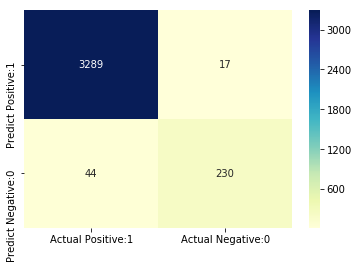

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Bisa dilihat untuk hasil dari visualisasi dari confusion matrix nya

# **Metrik klasifikasi** <a class="anchor" id="17"></a>



### Classification Report

Laporan klasifikasi (classification report) adalah cara lain untuk mengevaluasi kinerja model klasifikasi. Ini menampilkan skor presisi (precision), recall, f1, dan support untuk model.
- Laporan klasifikasi ini memberikan wawasan lebih detail tentang kinerja model dalam memprediksi setiap kelas. Presisi mengukur seberapa banyak dari prediksi positif yang sebenarnya benar, recall mengukur seberapa banyak dari kelas positif yang diprediksi dengan benar oleh model, sedangkan f1 adalah rata-rata harmonik dari presisi dan recall. Support adalah jumlah kemunculan setiap kelas dalam data pengujian. Dengan memahami laporan klasifikasi, kita dapat mengevaluasi kinerja model dengan lebih baik, terutama dalam hal pengenalan kelas minoritas dan mayoritas serta ketidakseimbangan kelas.

#Mencetak Clasification Report

 untuk mencetak laporan klasifikasi yang memberikan detail tentang metrik evaluasi kinerja model klasifikasi.

- from sklearn.metrics import classification_report: Ini mengimpor fungsi classification_report dari modul sklearn.metrics, yang digunakan untuk menghasilkan laporan klasifikasi.

- print(classification_report(y_test, y_pred_test)): Ini mencetak laporan klasifikasi untuk membandingkan label sebenarnya (y_test) dengan label yang diprediksi oleh model (y_pred_test). Laporan ini akan mencakup presisi, recall, f1-score, dan support untuk setiap kelas dalam dataset pengujian. Dengan demikian, ini memberikan wawasan yang lebih rinci tentang kinerja model dalam memprediksi setiap kelas.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3306
           1       0.93      0.84      0.88       274

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



### Akurasi klasifikasi

Untuk mengklasifikasikan keakuratannya kita gunakan code sebagai berikut :
- TP = cm[0,0], TN = cm[1,1], FP = cm[0,1], dan FN = cm[1,0]: Ini menghitung nilai True Positives (TP), True Negatives (TN), False Positives (FP), dan False Negatives (FN) dari matriks kebingungan (cm) yang sebelumnya telah dihitung.

- classification_accuracy = (TP + TN) / float(TP + TN + FP + FN): Ini menghitung akurasi klasifikasi menggunakan rumus: (TP + TN) / (TP + TN + FP + FN). Akurasi klasifikasi adalah proporsi dari total sampel yang diklasifikasikan dengan benar oleh model terhadap total jumlah sampel dalam data pengujian.

- print('Classification accuracy : {0:0.4f}'.format(classification_accuracy)): Ini mencetak nilai akurasi klasifikasi dengan format desimal hingga empat tempat desimal. Ini memberikan informasi tentang seberapa baik model dapat mengklasifikasikan sampel secara benar dalam data pengujian.

In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


Classification accuracy : 0.9830



Hasil dari kode tersebut menunjukkan bahwa akurasi klasifikasi adalah 0.9830. Ini berarti model klasifikasi secara benar mengklasifikasikan sekitar 98.30% dari total sampel dalam data pengujian dengan benar.

### Kesalahan klasifikasi

Untuk mengklasifikasikan error nya kita gunakan code sebagai berikut :
- classification_error = (FP + FN) / float(TP + TN + FP + FN): Ini menghitung error klasifikasi menggunakan rumus: (FP + FN) / (TP + TN + FP + FN). Error klasifikasi adalah proporsi dari total sampel yang salah diklasifikasikan oleh model terhadap total jumlah sampel dalam data pengujian.

- print('Classification error : {0:0.4f}'.format(classification_error)): Ini mencetak nilai error klasifikasi dengan format desimal hingga empat tempat desimal. Ini memberikan informasi tentang seberapa sering model salah memprediksi kelas data pengujian.

In [ ]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


Classification error : 0.0170



Hasil dari kode tersebut menunjukkan bahwa error klasifikasi adalah 0.0170. Ini berarti sekitar 1.70% dari total sampel dalam data pengujian salah diklasifikasikan oleh model.

### Precision



Presisi (precision) dapat didefinisikan sebagai persentase hasil positif yang diprediksi dengan benar dari semua hasil positif yang diprediksi. Secara matematis, presisi adalah rasio dari True Positives (TP) terhadap jumlah True Positives dan False Positives (TP + FP).

Dengan kata lain, presisi mengidentifikasi proporsi hasil positif yang diprediksi dengan benar. Presisi lebih berkaitan dengan kelas positif daripada kelas negatif. Ini berfokus pada seberapa baik model memprediksi hasil positif dan seberapa sedikit hasil negatif yang salah diprediksi sebagai positif.

Secara matematis, presisi dapat didefinisikan sebagai rasio TP terhadap (TP + FP). Presisi memberikan informasi tentang seberapa banyak hasil positif yang diprediksi dengan benar oleh model, dan ini penting terutama dalam kasus di mana ada konsekuensi yang signifikan untuk melakukan kesalahan prediksi positif. Semakin tinggi nilai presisi, semakin baik model dalam memprediksi hasil positif.




- precision = TP / float(TP + FP): Ini menghitung nilai presisi menggunakan rumus: TP / (TP + FP). Presisi adalah proporsi dari True Positives (TP) terhadap total True Positives dan False Positives (TP + FP).

- print('Precision : {0:0.4f}'.format(precision)): Ini mencetak nilai presisi dengan format desimal hingga empat tempat desimal. Ini memberikan informasi tentang seberapa baik model memprediksi hasil positif dalam data pengujian. Semakin tinggi nilai presisi, semakin baik model dalam memisahkan hasil positif dengan benar.

In [ ]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))


Precision : 0.9949


Hasil dari kode tersebut menunjukkan bahwa nilai presisi (precision) adalah 0.9949. Ini berarti sekitar 99.49% dari hasil positif yang diprediksi oleh model adalah benar positif, atau dalam istilah lain, model memiliki tingkat keakuratan yang tinggi dalam memprediksi hasil positif. Semakin tinggi nilai presisi, semakin baik model dalam memisahkan hasil positif dengan benar dari hasil negatif.

### Recall



Recall, juga dikenal sebagai sensitivitas, dapat didefinisikan sebagai persentase hasil positif yang diprediksi dengan benar dari semua hasil positif yang sebenarnya. Secara matematis, recall adalah rasio True Positives (TP) terhadap jumlah True Positives dan False Negatives (TP + FN).

Dengan kata lain, recall mengidentifikasi proporsi hasil positif yang diprediksi dengan benar dari semua hasil positif yang sebenarnya. Recall lebih berkaitan dengan kelas positif daripada kelas negatif. Ini berfokus pada seberapa baik model memprediksi hasil positif dari keseluruhan jumlah hasil positif yang sebenarnya.

Secara matematis, recall dapat didefinisikan sebagai rasio TP terhadap (TP + FN). Recall memberikan informasi tentang seberapa banyak hasil positif yang diprediksi dengan benar oleh model relatif terhadap keseluruhan jumlah hasil positif yang sebenarnya. Semakin tinggi nilai recall, semakin baik model dalam mendeteksi hasil positif secara keseluruhan.


- recall = TP / float(TP + FN): Ini menghitung nilai recall menggunakan rumus: TP / (TP + FN). Recall adalah proporsi dari True Positives (TP) terhadap total True Positives dan False Negatives (TP + FN).

- print('Recall or Sensitivity : {0:0.4f}'.format(recall)): Ini mencetak nilai recall dengan format desimal hingga empat tempat desimal. Ini memberikan informasi tentang seberapa baik model dalam mendeteksi hasil positif dari keseluruhan jumlah hasil positif yang sebenarnya. Semakin tinggi nilai recall, semakin baik model dalam mendeteksi hasil positif secara keseluruhan.

In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9868



Hasil dari kode tersebut menunjukkan bahwa nilai recall (atau sensitivitas) adalah 0.9868. Ini berarti sekitar 98.68% dari total hasil positif yang sebenarnya berhasil dideteksi oleh model. Dengan kata lain, model memiliki tingkat kemampuan yang tinggi dalam mendeteksi hasil positif dari keseluruhan jumlah hasil positif yang sebenarnya. Semakin tinggi nilai recall, semakin baik model dalam mendeteksi hasil positif secara keseluruhan.

### True Positive Rate


**True Positive Rate (Tingkat True Positive) dan Recall (Sensitivitas) adalah istilah yang sering digunakan secara bergantian dan memiliki arti yang sama. Kedua istilah ini mengukur kemampuan model untuk mendeteksi hasil positif dari semua hasil positif yang sebenarnya dalam dataset.
- true_positive_rate = TP / float(TP + FN): Ini menghitung nilai True Positive Rate (Tingkat True Positive) menggunakan rumus: TP / (TP + FN). True Positive Rate (TPR) adalah istilah lain untuk recall atau sensitivitas, yang mengukur kemampuan model untuk mendeteksi hasil positif dari semua hasil positif yang sebenarnya.**

- print('True Positive Rate : {0:0.4f}'.format(true_positive_rate)): Ini mencetak nilai True Positive Rate dengan format desimal hingga empat tempat desimal. True Positive Rate memberikan informasi tentang seberapa baik model dalam mendeteksi hasil positif dari keseluruhan jumlah hasil positif yang sebenarnya. Semakin tinggi nilai True Positive Rate, semakin baik model dalam mendeteksi hasil positif secara keseluruhan.

In [ ]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9868



Hasil dari kode tersebut menunjukkan bahwa True Positive Rate (Tingkat True Positive) adalah 0.9868. Ini menegaskan bahwa sekitar 98.68% dari total hasil positif yang sebenarnya berhasil dideteksi oleh model. Ini mengkonfirmasi kemampuan model untuk mengenali hasil positif dari keseluruhan jumlah hasil positif yang sebenarnya. Semakin tinggi nilai True Positive Rate, semakin baik kemampuan model dalam mendeteksi hasil positif secara keseluruhan.

### False Positive Rate

- false_positive_rate = FP / float(FP + TN): Ini menghitung nilai False Positive Rate (Tingkat False Positive) menggunakan rumus: FP / (FP + TN). False Positive Rate (FPR) mengukur seberapa sering model salah memprediksi hasil negatif sebagai positif. Ini merupakan proporsi dari hasil negatif yang salah diprediksi sebagai positif dari keseluruhan jumlah hasil negatif yang sebenarnya dalam dataset.

- print('False Positive Rate : {0:0.4f}'.format(false_positive_rate)): Ini mencetak nilai False Positive Rate dengan format desimal hingga empat tempat desimal. False Positive Rate memberikan informasi tentang seberapa sering model memberikan hasil prediksi positif yang salah dari keseluruhan jumlah hasil negatif yang sebenarnya. Semakin rendah nilai False Positive Rate, semakin baik model dalam menghindari prediksi positif yang salah.

In [ ]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0688



Hasil dari kode tersebut menunjukkan bahwa False Positive Rate (Tingkat False Positive) adalah 0.0688. Ini menunjukkan bahwa sekitar 6.88% dari total hasil negatif yang sebenarnya salah diprediksi sebagai positif oleh model. Semakin rendah nilai False Positive Rate, semakin baik model dalam menghindari prediksi positif yang salah, yang merupakan indikator yang diinginkan untuk model klasifikasi yang baik.

### Specificity
Spesifisitas (specificity) adalah kebalikan dari False Positive Rate (FPR). Ini mengukur kemampuan model untuk menghindari memberikan hasil prediksi positif yang salah saat sebenarnya kelasnya adalah negatif. Secara matematis, spesifisitas dapat didefinisikan sebagai rasio True Negatives (TN) terhadap jumlah True Negatives dan False Positives (TN + FP).

Dengan kata lain, spesifisitas mengidentifikasi proporsi hasil negatif yang diprediksi dengan benar dari keseluruhan jumlah hasil negatif yang sebenarnya. Semakin tinggi nilai spesifisitas, semakin baik model dalam menghindari prediksi positif yang salah dan memberikan hasil negatif yang benar.


Dalam kode dibawah bisa dijelaskan sebagai berikut:

- specificity = TN / (TN + FP): Ini menghitung nilai spesifisitas menggunakan rumus TN / (TN + FP), di mana TN adalah True Negatives dan FP adalah False Positives.

- print('Specificity : {0:0.4f}'.format(specificity)): Ini mencetak nilai spesifisitas dengan format desimal hingga empat tempat desimal. Ini memberikan informasi tentang seberapa baik model dalam menghindari memberikan hasil positif yang salah saat sebenarnya kelasnya adalah negatif. Semakin tinggi nilai spesifisitas, semakin baik kemampuan model dalam memprediksi hasil negatif yang benar.

In [ ]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9312



Hasil dari kode tersebut menunjukkan bahwa nilai spesifisitas (specificity) adalah 0.9312. Ini menunjukkan bahwa sekitar 93.12% dari total hasil negatif yang sebenarnya berhasil diprediksi dengan benar oleh model sebagai negatif. Semakin tinggi nilai spesifisitas, semakin baik model dalam menghindari memberikan hasil positif yang salah saat sebenarnya kelasnya adalah negatif, yang merupakan indikator yang diinginkan untuk model klasifikasi yang baik.

### f1-score



F1-score adalah ukuran yang menggabungkan presisi (precision) dan recall dalam satu nilai tunggal. Ini merupakan harmonic mean (rata-rata harmonis) dari presisi dan recall. F1-score memberikan gambaran tentang seberapa baik model dapat memprediksi kelas positif dan mengidentifikasi semua contoh yang benar dari kelas tersebut. Skor F1 berkisar dari 0 hingga 1, di mana nilai 1 menunjukkan kinerja yang sempurna dan nilai 0 menunjukkan kinerja yang buruk.

Karena F1-score merupakan harmonic mean dari presisi dan recall, skor F1 memberikan penilaian yang seimbang antara presisi dan recall. Ini bermanfaat terutama dalam kasus di mana kelas positif dan negatif tidak seimbang dalam dataset. Jika kita hanya memperhatikan akurasi global, hal ini dapat menyesatkan jika kelas-kelas tersebut tidak seimbang.

Karena F1-score memperhitungkan kedua presisi dan recall, maka dapat memberikan gambaran yang lebih baik tentang kinerja model klasifikasi secara keseluruhan daripada hanya memperhatikan akurasi global. Oleh karena itu, untuk membandingkan kinerja antara berbagai model klasifikasi, sebaiknya menggunakan rata-rata terbobot dari skor F1 daripada hanya mengandalkan akurasi global.


[Go to Top](#0)